Iniciamos con la importación de las librerías necesarias y el cargado del dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimpy import skim
import seaborn as sns

In [2]:
# Load the CSV file with the first column as the index
df = pd.read_csv('laspalomas.csv', index_col=0)

Eliminaremos la variable X pues es idéntica al nombre de cada observación, lo que no nos aporta información adicional. Obtenemos el mes y el año desde la fecha, y posteriormente eliminamos la variable fecha.


In [3]:

df = df.drop(columns=['X'], errors='ignore')

# Convert 'Fecha' to datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Mes'] = df['Fecha'].dt.month
df['Anno'] = df['Fecha'].dt.year

df = df.drop(columns=['Fecha'], errors='ignore')


Podemos ver ahora los datos:

In [4]:
df.head()

,Id_Estacion_id,Precipitacion,Temp_aire,Mes,Anno
1,11-0055,NaN,NaN,1,2003
2,11-0055,NaN,NaN,1,2003
3,11-0055,NaN,NaN,1,2003
4,11-0055,NaN,NaN,1,2003
5,11-0055,NaN,NaN,1,2003


Notamos que los datos contienen gran cantidad de valores nulos. Vamos a calcular el porcentaje de valores nulos en cada column.

In [5]:

nan_percentage = df.isna().mean() * 100

# Print the result
print(nan_percentage)

Id_Estacion_id     0.000000
Precipitacion      6.165836
Temp_aire         18.396003
Mes                0.000000
Anno               0.000000
dtype: float64


Si bien los valores nulos son significativos en las columnas de Precipitacion y Temperatura, procedemos a eliminarlos para continuar con el análisis.

In [6]:
df.dropna(inplace=True)

In [7]:
df.describe()

,Precipitacion,Temp_aire,Mes,Anno
count,72212.000000,72212.000000,72212.000000,72212.000000
mean,0.152645,14.772568,6.732662,2011.562164
std,1.307398,4.821990,3.535519,5.513021
min,0.000000,-2.800000,1.000000,2003.000000
25%,0.000000,11.600000,4.000000,2006.000000
50%,0.000000,14.100000,7.000000,2011.000000
75%,0.000000,18.200000,10.000000,2016.000000
max,113.540000,32.500000,12.000000,2023.000000


Como primer visualización, tomamos el promedio de precipitaciones por mes.

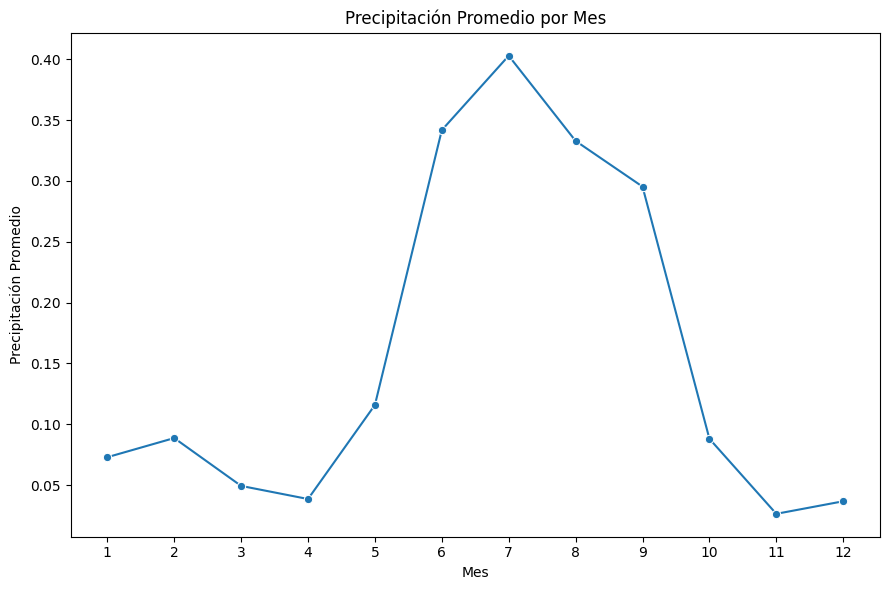

In [8]:
# Group by month and calculate the mean of Precipitacion for each month
monthly_precipitation = df.groupby('Mes')['Precipitacion'].mean()

# Create the plot
plt.figure(figsize=(9, 6))
sns.lineplot(x=monthly_precipitation.index, y=monthly_precipitation.values, marker='o')

# Customize the plot
plt.xlabel('Mes')
plt.ylabel('Precipitación Promedio')
plt.title('Precipitación Promedio por Mes')
plt.xticks(range(1, 13))  # Ensure x-axis shows all months from 1 to 12

# Show the plot
plt.tight_layout()
plt.show()


Notamos que, durante los meses de verano y otoño, las precipitaciones son más abundantes. Esto coincide con el conocimiento empírico de la temporada de lluvias en la región. Sin embargo, es interesante observar que durante los meses de invierno, también hay algunas precipitaciones. Procederemos con un boxplot de las precipitaciones por mes.

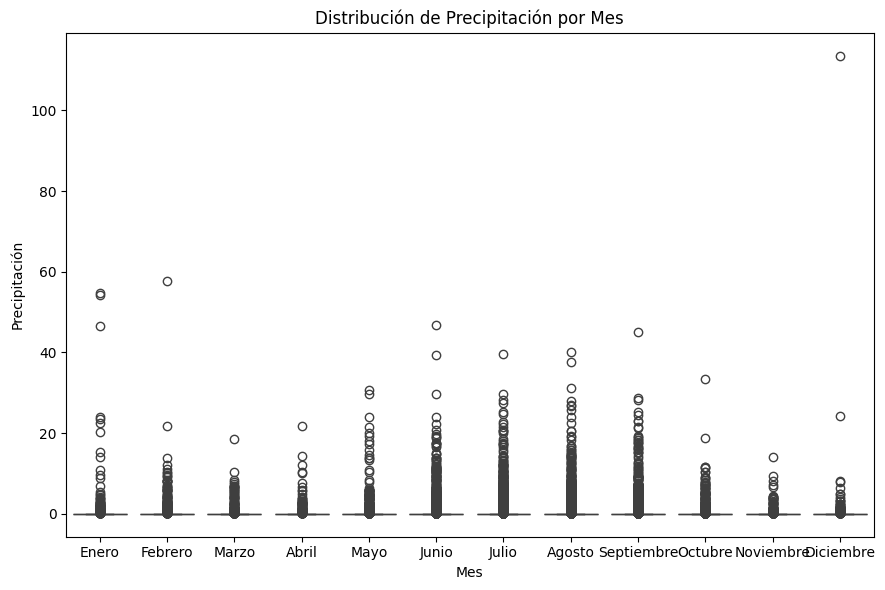

In [9]:
# Create the boxplot
plt.figure(figsize=(9, 6))
sns.boxplot(x='Mes', y='Precipitacion', data=df)

# Customize the plot
plt.xlabel('Mes')
plt.ylabel('Precipitación')
plt.title('Distribución de Precipitación por Mes')
plt.xticks(range(12), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])

# Show the plot
plt.tight_layout()
plt.show()


Notamos que la incidencia de ceros en el nivel de precipitación lleva a las cajas a estar concentradas en cero, sin embargo observamos que durante la temporada de lluvias, las precipitaciones son más intensas y más frecuentes.

Seguimos con la temperatura promedio por mes.

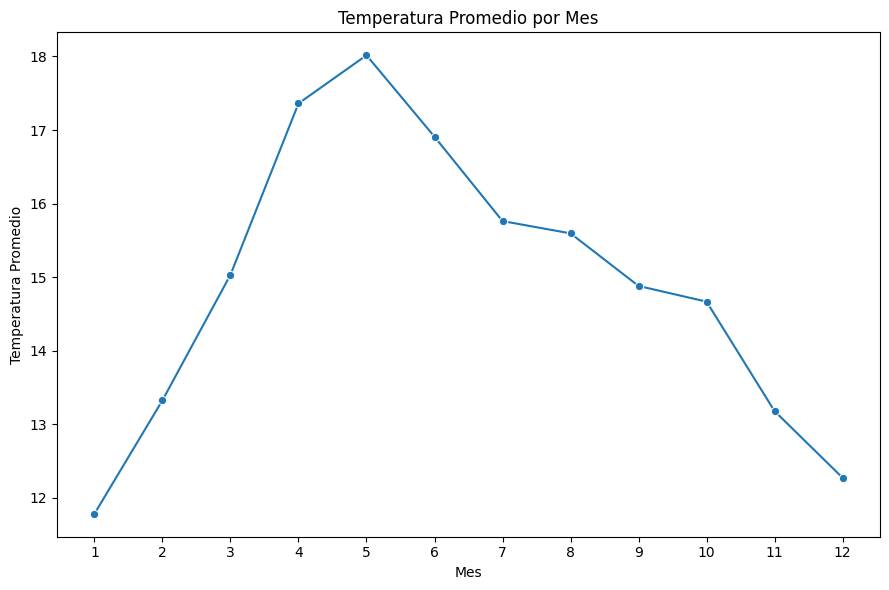

In [10]:
# Group by Month and calculate the mean of Precipitacion for each month
monthly_temperature = df.groupby('Mes')['Temp_aire'].mean()

# Create the plot
plt.figure(figsize=(9, 6))
sns.lineplot(x=monthly_temperature.index, y=monthly_temperature.values, marker='o')

# Customize the plot
plt.xlabel('Mes')
plt.ylabel('Temperatura Promedio')
plt.title('Temperatura Promedio por Mes')
plt.xticks(range(1, 13))  # Ensure x-axis shows all months from 1 to 12

# Show the plot
plt.tight_layout()
plt.show()

Notamos que, en promedio, la mayor temperatura promedio se registra durante la primavera, mientras que la menor se registra durante el invierno. Resulta extraño que la mayor temperatura promedio no sea registrada durante el verano, sin embargo es posible que esto se deba a alguna relación entre la temperatura y las precipitaciones, de forma que las precipitaciones registradas en temporada de lluvias bajen la temperatura durante estos meses. Procedemos con un boxplot para confirmar empíricamente esta suposición.

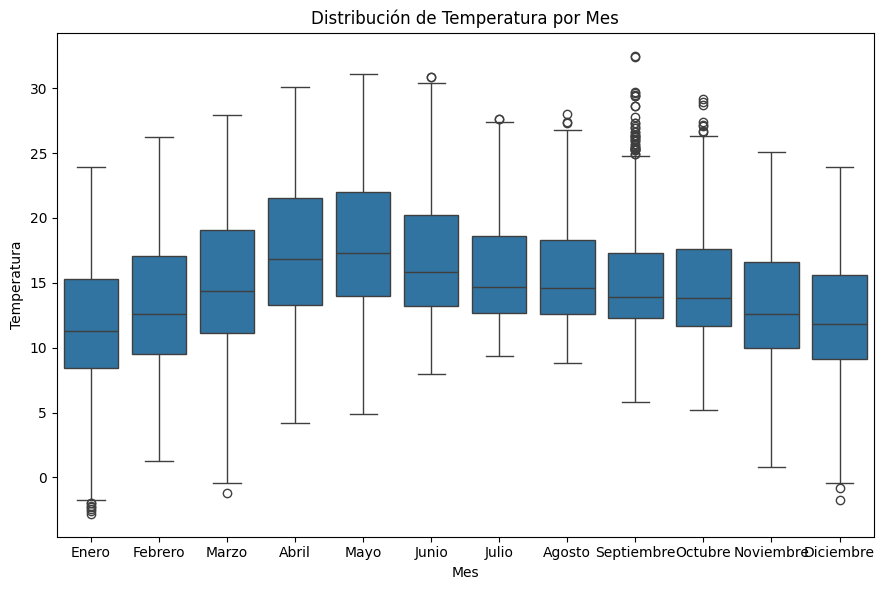

In [11]:
# Create the boxplot
plt.figure(figsize=(9, 6))
sns.boxplot(x='Mes', y='Temp_aire', data=df)

# Customize the plot
plt.xlabel('Mes')
plt.ylabel('Temperatura')
plt.title('Distribución de Temperatura por Mes')
plt.xticks(range(12), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])

# Show the plot
plt.tight_layout()
plt.show()


Notamos que la suposición se confirma empíricamente, pues el intervalo superior durante los meses de verano es mucho mayor hacia las temperaturas más altas que el resto del año, incluso en septiembre se registran algunas de las temperaturas más altas, pero estas se encuentran como valores atípicos. De hecho, el intervalo inferior alcanza el máximo en julio, mientras que el intervalo superior lo hace en mayo.

Finalmente, presentamos un scatter plot de la temperatura y el nivel de precipitaciones para observar la relación entre estas dos variables.

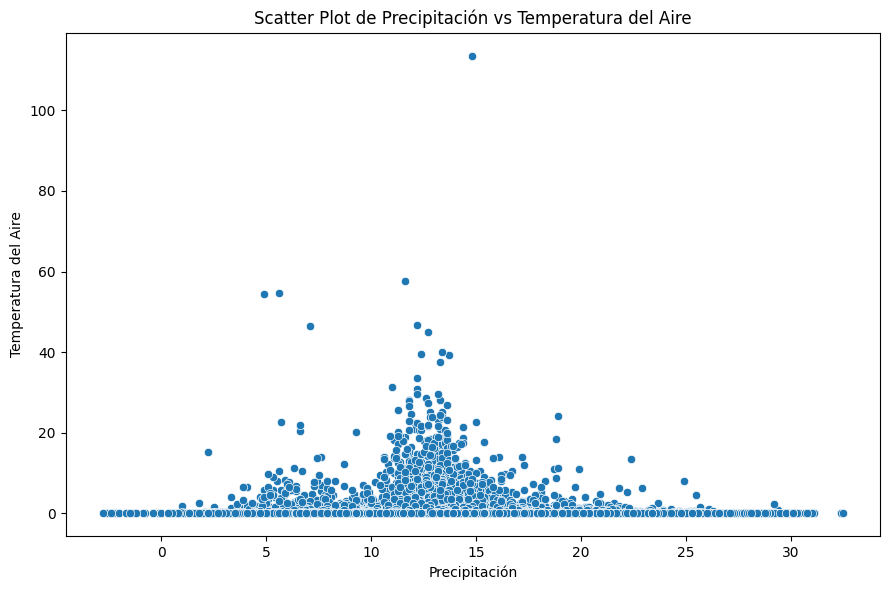

In [12]:
# Create the scatter plot
plt.figure(figsize=(9, 6))
sns.scatterplot(x='Temp_aire', y='Precipitacion', data=df)

# Customize the plot
plt.xlabel('Precipitación')
plt.ylabel('Temperatura del Aire')
plt.title('Scatter Plot de Precipitación vs Temperatura del Aire')

# Show the plot
plt.tight_layout()
plt.show()

Notamos que parece existir una relación entre la temperatura y el nivel de precipitaciones, sin embargo, la relación no es lineal, pues no hay alta frecuencia de precipitaciones cuando la temperatura es muy alta o baja.

Ahora, consideramos solamente los valores numéricos del dataframe, de forma que perdemos el ID de la estación.

In [13]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

print(numerical_df.head())  # Check the first few rows


     Precipitacion  Temp_aire  Mes  Anno
421           2.03       12.0    8  2003
422           0.51       12.1    8  2003
423           0.00       13.0    8  2003
424          14.48       11.2    8  2003
425          13.72       11.1    8  2003


In [14]:
skim(numerical_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 72212  │ │ float64     │ 2     │                                                          │
│ │ Number of columns │ 4      │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column            ┃ NA  ┃ NA %   ┃ mean     ┃ sd      ┃ p0     ┃ p25    ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Precipitacion     │   0 │      0 │   0.1526 │   1.307 │      0 │      0 │     0 │     0 │  113.5 │    ▇    │  │
│ │ Temp_aire         │   0 │      0 │    14.77 │   4.822 │   -2.8 │   11.6 │  14.1 │  18.2 │   32.5 │   ▂▇▅▂  │  │
│ │ Mes               │   0 │      0 │    6.733 │   3.536 │      1 │      4 │     7 │    10 │     12 │ ▇▆▆▇▇▇  │  │
│ │ Anno              │   0 │      0 │     2012 │   5.513 │   2003 │   2006 │  2011 │  2016 │   2023 │ ▇▃▅▇▃▃  │  │
│ └───────────────────┴─────┴────────┴──────────┴─────────┴────────┴────────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Estandarizamos los datos para el análisis de componentes principales.

In [15]:
scaler = StandardScaler()

# Standardize the numerical data
numerical_df_standardized = pd.DataFrame(scaler.fit_transform(numerical_df), 
                                         columns=numerical_df.columns, 
                                         index=numerical_df.index)

print(numerical_df_standardized.head())  # Check the first few rows


     Precipitacion  Temp_aire       Mes      Anno
421       1.435957  -0.574988  0.358461 -1.553091
422       0.273335  -0.554250  0.358461 -1.553091
423      -0.116756  -0.367604  0.358461 -1.553091
424      10.958755  -0.740896  0.358461 -1.553091
425      10.377443  -0.761634  0.358461 -1.553091


Inicializamos el PCA.

In [16]:
pca=PCA(2) # se puede especificar máximo número de componentes o % varianza explicada que se quiere alcanzar

In [17]:
pca.fit(numerical_df_standardized)

PCA(n_components=2)

In [18]:
#https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html

def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

Los dos primeros componentes explican apenas el 53% de la varianza de los datos.

In [19]:
pca_summary(pca, numerical_df_standardized)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.051078,0.276191,0.276191
PC2,1.015517,0.257819,0.534010


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.051078,0.276191,0.276191
PC2,1.015517,0.257819,0.534010


Ahora, veamos qué variables están más relacionadas con cada uno de los componentes principales. Para esto, vamos a graficar las dos primeras componentes principales y ver qué variables están más cerca del origen (cercanas a cero) o lejos del mismo (lejanas a cero). Esto nos dará una idea de qué variables están más relacionadas con cada componente principal.

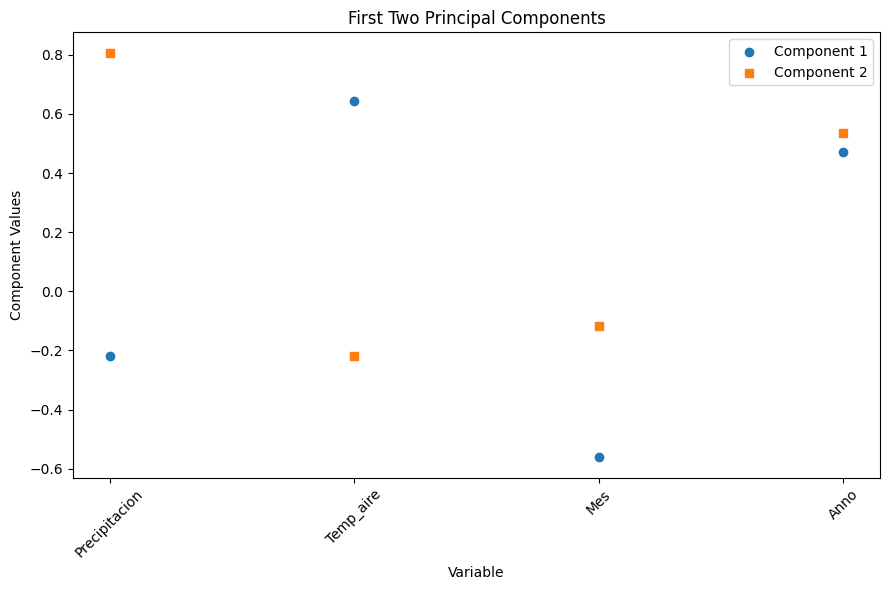

In [20]:
components = pca.components_
comp1 = components[0]
comp2 = components[1]
variables = numerical_df.columns.values  # Get variable names

plt.figure(figsize=(9, 6))

plt.scatter(variables, comp1, label='Component 1', marker='o')
plt.scatter(variables, comp2, label='Component 2', marker='s')

plt.title('First Two Principal Components')
plt.xlabel('Variable')
plt.ylabel('Component Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()

plt.tight_layout()
plt.show()


Los componentes principales, en este caso, no son de gran información útil para entender la relación entre las variables. Esto puede deberse a que ña posible relación entre Temperatura y Precipitación parece no ser lineal, y PCA identifica relaciones lineales. El primer componente principal hace un promedio del año y de las temperatura del aire, mientras que el segundo hace un contraste entre las mismas variables. Esto se puede ver claramente a continuación, en el biplot.

In [21]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

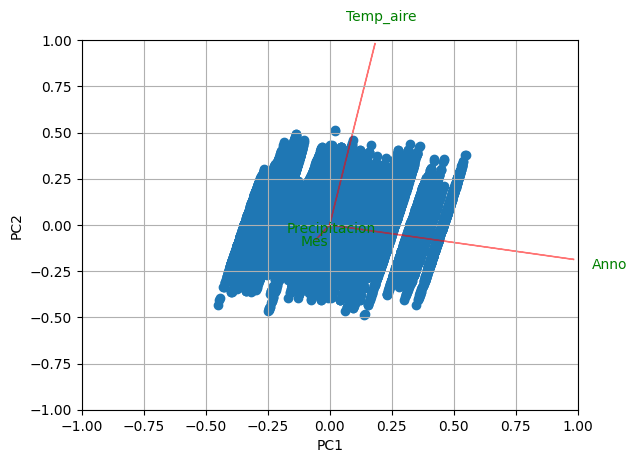

In [22]:
scores=pca.fit_transform(numerical_df)
myplot(scores[:,0:2],np.transpose(pca.components_[0:2, :]),labels=numerical_df.columns.values)

Podríamos repetir este análisis eliminando el mes y el año como variables, pero obtendríamos que las componentes son casi idénticas a los vectores canónicos. Esto sugiere que la relación entre las variables no es lineal, como lo dijimos anteriormente. Podríamos utilizar otras técnicas que serán estudiadas más adelante para compensar esta situación.